In [1]:
from NathanLibrary import *
import keyboard
import time
import pyautogui as pag

# Graph Data Importer
### Run the following cell block and follow the instructions carefully

Open up an image of the graph you'd like to import side-by-side with this window
Make sure you can see the whole graph since we'll be capturing mouse coordinates and the graph needs to be in the same relative position.
Please enter the variable name for the x-axis.
T
Please enter the unit for the x-axis.
degC
Please enter the scale for the x-axis.
linear
Hover the mouse over the lower bound for the x-axis and pres Enter.
Now enter the VALUE of the lower bound for the x-axis.
-100
Hover the mouse over the upper bound for the x-axis and pres Enter.
Now enter the VALUE of the upper bound for the x-axis.
1500
Please enter the variable name for the y-axis.
rho
Please enter the unit for the y-axis.
kg / m**3
Please enter the scale for the y-axis.
linear
Hover the mouse over the lower bound for the y-axis and pres Enter.
Now enter the VALUE of the lower bound for the y-axis.
0
Hover the mouse over the upper bound for the y-axis and pres Enter.
Now enter the VALUE of the upper bound for the y-

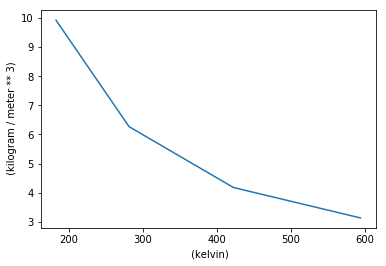

Does the graph look correct? (y/n, n means you'd like to try capturing this data again)
n
Deleting data and trying again.
Now trace along the line by hovering the mouse over the line and pressing Enter to save each position.  Please load each value from right to left.
Press Escape once you've loaded each point.
Here's what your inputed data looks like


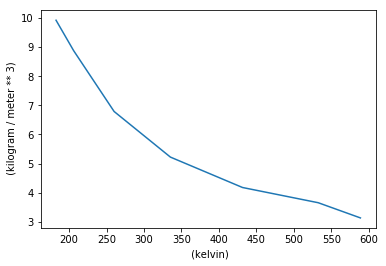

Does the graph look correct? (y/n, n means you'd like to try capturing this data again)
y
Enter the value for line #1 in this series.  Type "done" to complete the series.
10
Now trace along the line by hovering the mouse over the line and pressing Enter to save each position.  Please load each value from right to left.
Press Escape once you've loaded each point.
Here's what your inputed data looks like


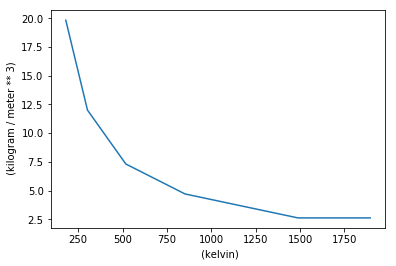

Does the graph look correct? (y/n, n means you'd like to try capturing this data again)
y
Enter the value for line #2 in this series.  Type "done" to complete the series.
20
Now trace along the line by hovering the mouse over the line and pressing Enter to save each position.  Please load each value from right to left.
Press Escape once you've loaded each point.
Here's what your inputed data looks like


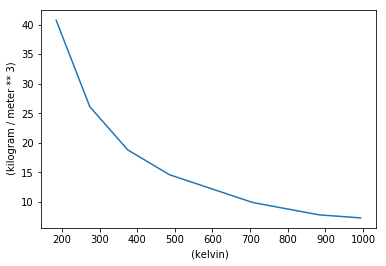

Does the graph look correct? (y/n, n means you'd like to try capturing this data again)
y
Enter the value for line #3 in this series.  Type "done" to complete the series.
50
Now trace along the line by hovering the mouse over the line and pressing Enter to save each position.  Please load each value from right to left.
Press Escape once you've loaded each point.
Here's what your inputed data looks like


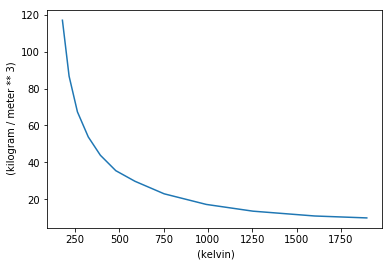

Does the graph look correct? (y/n, n means you'd like to try capturing this data again)
y
Enter the value for line #4 in this series.  Type "done" to complete the series.
100
Now trace along the line by hovering the mouse over the line and pressing Enter to save each position.  Please load each value from right to left.
Press Escape once you've loaded each point.
Here's what your inputed data looks like


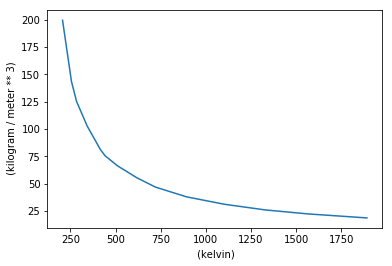

Does the graph look correct? (y/n, n means you'd like to try capturing this data again)
y
Enter the value for line #5 in this series.  Type "done" to complete the series.
1000
Now trace along the line by hovering the mouse over the line and pressing Enter to save each position.  Please load each value from right to left.
Press Escape once you've loaded each point.
Here's what your inputed data looks like


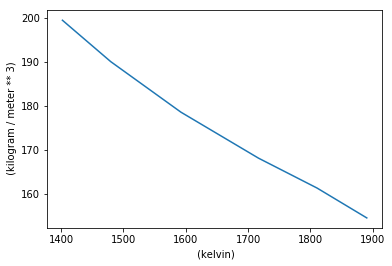

Does the graph look correct? (y/n, n means you'd like to try capturing this data again)
y
Enter the value for line #6 in this series.  Type "done" to complete the series.
done
Enter the name of the variable for series #1. Type "done" to finish entering data.
done


In [11]:
print("Open up an image of the graph you'd like to import side-by-side with this window")
print("Make sure you can see the whole graph since we'll be capturing mouse coordinates and the graph needs to be in the same relative position.")

def getInputValue(exceptions=None):
    if isinstance(exceptions,(list,tuple,set)):
        pass
    else:
        exceptions = [exceptions,]
    val = None
    while True:
        val = input()
        if val in set(exceptions):
            break
        try:
            float(val)
            break
        except:
            print("Error! \"" + val + "\" is not a valid value.  Please try again.")
    return val

def getInputUnits(exceptions=None):
    if isinstance(exceptions,(list,tuple,set)):
        pass
    else:
        exceptions = [exceptions,]
        
    units = None
    while True:
        units = input()
        if units in set(exceptions):
            break
        try:
            u(units)
            break
        except:
            if units in {"degC","degF"}:
                break
            else:
                print("Error! \"" + units + "\" is not a valid unit.  Please try again.")
    return units

def getInputScale(exceptions=None):
    if isinstance(exceptions,(list,tuple,set)):
        pass
    else:
        exceptions = [exceptions,]
        
    scale = None
    while True:
        scale = input()
        if scale in set(exceptions):
            break
        if scale not in {"linear","log"}:
            print("Error! \"" + scale + "\" is not a valid scale. Please enter \"linear\" or \"log\"")
        else:
            break
    return scale

def getInputOkay():
    while True:
        ok = input()
        if ok == "y":
            return True
        elif ok == "n":
            return False
        else:
            print("Error! \"" + ok + "\" is not a valid response. Please type \"y\" or \"n\".")

def assignUnit(value,unit):
    if unit == "degC":
        return degC(value)
    if unit == "degF":
        return degF(value)
    else:
        return value * u(unit)

units = [0,0]
axes = ["x","y"]
boundLabels = ["lower","upper"]
scales = [None,None]
axisVars = [0,0]

bounds = [[0,0],[0,0]]


for i in range(len(axes)):
    print("Please enter the variable name for the " + axes[i] + "-axis.")
    axisVars[i] = input()
    
    print("Please enter the unit for the " + axes[i] + "-axis.")
    units[i] = getInputUnits()
    
    print("Please enter the scale for the " + axes[i] + "-axis.")
    scale = getInputScale()
    scales[i] = scale
    
    for j in range(len(boundLabels)):
        time.sleep(0.5)
        print("Hover the mouse over the " + boundLabels[j] + " bound for the " + axes[i] + "-axis and pres Enter.")
        while True:
            if keyboard.is_pressed('enter'):
                break
        pval = pag.position()[i]
        print("Now enter the VALUE of the " + boundLabels[j] + " bound for the " + axes[i] + "-axis.")
        val = assignUnit(float(getInputValue()),units[i])
        
        bounds[i][j] = [pval,val]
    
    
def getInputLine(graph=True):
    linePoints = []
    while True:
        linePoints = []
        time.sleep(0.7)
        print("Now trace along the line by hovering the mouse over the line and pressing Enter to save each position.  Please load each value from right to left.")
        print("Press Escape once you've loaded each point.")
        linePoints = []
        while True:
            if keyboard.is_pressed('enter'):
                px,py = pag.position()
                #interpolate the xs:
                xval = interp1D(px,bounds[0],scales[0])
                yval = interp1D(py,bounds[1],scales[1])

                linePoints.append([xval,yval])
                time.sleep(0.1)
            elif keyboard.is_pressed('esc'):
                break
        if graph:
            print("Here's what your inputed data looks like")
            xs = []
            ys = []
            for point in linePoints:
                x,y = point
                xs.append(x)
                ys.append(y)
            pintPlot(xs,ys)
            plt.show()
            print("Does the graph look correct? (y/n, n means you'd like to try capturing this data again)")
            ok = getInputOkay()
            if ok:
                break
            else:
                print("Deleting data and trying again.")
        else:
            break
    return linePoints

series = {}
while True:
    seriesName = None
    seriesUnit = None
    print("Enter the name of the variable for series #" + str(len(series)) + ". Type \"done\" to finish entering data.")
    seriesName = input()
    if seriesName == "done":
        break
        
    print("Enter the unit for series #" + str(len(series)) + "(type \"dimensionless\" for a dimensionless number).")
    seriesUnit = getInputUnits()
    
    print("Enter the scale for series #" + str(len(series)))
    seriesScale = getInputScale()
    
    lines = []
    while True:
        print("Enter the value for line #" + str(len(lines)) + " in this series.  Type \"done\" to complete the series.")
        lineVal = getInputValue("done")
        if lineVal == "done":
            break
        
        lineVal = assignUnit(float(lineVal),seriesUnit)
        
        linePoints = getInputLine()
    
        lines.append([lineVal,linePoints])
    series[seriesName] = [seriesName,lines,seriesScale]


### Once you've imported the data, run the following cell to print it.
### Copy and paste the output of this cell to your library to store the data

In [12]:
def getValStr(val):
    returnStr = str(val.magnitude) + " * u(\"" + str(val.units) + "\")"
    return returnStr

outputString = "#See GraphReader.ipynb to see how this data was generated\ngraphData = [\n"

#Axis Info
outputString += "\t[\"" + axisVars[0] + "\",\"" + scales[0] + "\"], \t#x-axis definition\n"
outputString += "\t[\"" + axisVars[1] + "\",\"" + scales[1] + "\"], \t#y-axis definition\n"

#Bounds Info
#Lower X bounds
outputString += "\t[[[" + str(bounds[0][0][0]) + "," + getValStr(bounds[0][0][1]) + "], "
#Upper X bounds
outputString += "[" + str(bounds[0][1][0]) + "," + getValStr(bounds[0][1][1]) + "]], #x bounds\n"
#Lower Y bounds
outputString += "\t [[" + str(bounds[1][0][0]) + "," + getValStr(bounds[1][0][1]) + "], "
#Upper Y bounds
outputString += "[" + str(bounds[1][1][0]) + "," + getValStr(bounds[1][1][1])+ "]]],[ #y bounds\n"

#Now on to the serries information
for ser in series:
    outputString += "\n\t[\"" + ser + "\",\"" + series[ser][2] + "\",[\t#series definition\n" 
    for line in series[ser][1]:
        outputString += "\t\t[" + getValStr(line[0]) + ", #Line definition\n"
        outputString += "\t\t\t["
        for point in line[1]:
            outputString += "[" + getValStr(point[0]) + ", " + getValStr(point[1]) + "], "
        outputString = outputString[:-2]
        outputString += "]], \n"
    outputString = outputString[:-3]
    outputString += "]], "
outputString = outputString[:-2]
outputString += "]\n]"
print(outputString)

#See GraphReader.ipynb to see how this data was generated
graphData = [
	["T","linear"], 	#x-axis definition
	["rho","linear"], 	#y-axis definition
	[[[1047,173.14999999999998 * u("kelvin")], [1728,1773.15 * u("kelvin")]], #x bounds
	 [[247,200.0 * u("kilogram / meter ** 3")], [630,0.0 * u("kilogram / meter ** 3")]]],[ #y bounds

	["P","log",[	#series definition
		[5.0 * u("standard_atmosphere"), #Line definition
			[[182.5479441997063 * u("kelvin"), 9.921671018276754 * u("kilogram / meter ** 3")], [206.04280469897185 * u("kelvin"), 8.877284595300239 * u("kilogram / meter ** 3")], [260.0809838472833 * u("kelvin"), 6.788511749347208 * u("kilogram / meter ** 3")], [335.2645374449339 * u("kelvin"), 5.221932114882463 * u("kilogram / meter ** 3")], [431.5934654919238 * u("kelvin"), 4.177545691906005 * u("kilogram / meter ** 3")], [431.5934654919238 * u("kelvin"), 4.177545691906005 * u("kilogram / meter ** 3")], [532.6213656387663 * u("kelvin"), 3.6553524804177187 * u("kilogram / meter ** 3"

In [63]:
# #See GraphReader.ipynb to see how this data was generated
# graphData = [
# 	["T","linear"], 	#x-axis definition
# 	["mu","linear"], 	#y-axis definition
# 	[[[1067,73.14999999999998 * u("kelvin")], [1849,1873.15 * u("kelvin")]], #x bounds
# 	 [[255,200.0 * u("micropascal * second")], [729,0.0 * u("micropascal * second")]]],[ #y bounds

# 	["P","log",[	#series definition
# 		[10000.0 * u("standard_atmosphere"), #Line definition
# 			[[294.12186700767234 * u("kelvin"), 200.0 * u("micropascal * second")], [294.1218670076 * u("kelvin"), 200.0 * u("micropascal * second")], [462.15255754475675 * u("kelvin"), 169.62025316455697 * u("micropascal * second")], [462.15255754475675 * u("kelvin"), 169.62025316455697 * u("micropascal * second")], [713.0476982097184 * u("kelvin"), 141.35021097046413 * u("micropascal * second")], [713.0476982097184 * u("kelvin"), 141.35021097046413 * u("micropascal * second")], [853.4569053708437 * u("kelvin"), 132.91139240506328 * u("micropascal * second")], [853.4569053708437 * u("kelvin"), 132.91139240506328 * u("micropascal * second")], [1125.0681585677748 * u("kelvin"), 120.67510548523205 * u("micropascal * second")], [1125.0681585677748 * u("kelvin"), 120.67510548523205 * u("micropascal * second")], [1288.4952685421995 * u("kelvin"), 115.61181434599155 * u("micropascal * second")], [1288.4952685421995 * u("kelvin"), 115.61181434599155 * u("micropascal * second")], [1594.6333759590793 * u("kelvin"), 110.9704641350211 * u("micropascal * second")], [1594.6333759590793 * u("kelvin"), 110.9704641350211 * u("micropascal * second")]]], 
# 		[5000.0 * u("standard_atmosphere"), #Line definition
# 			[[29.415984654731346 * u("kelvin"), 180.168776371308 * u("micropascal * second")], [29.415984654731346 * u("kelvin"), 180.168776371308 * u("micropascal * second")], [176.73056265984633 * u("kelvin"), 132.0675105485232 * u("micropascal * second")], [176.73056265984633 * u("kelvin"), 132.0675105485232 * u("micropascal * second")], [257.2932225063937 * u("kelvin"), 115.61181434599155 * u("micropascal * second")], [257.2932225063937 * u("kelvin"), 115.61181434599155 * u("micropascal * second")], [319.44156010230154 * u("kelvin"), 106.75105485232066 * u("micropascal * second")], [319.44156010230154 * u("kelvin"), 106.75105485232066 * u("micropascal * second")], [402.3060102301788 * u("kelvin"), 100.42194092827003 * u("micropascal * second")], [402.3060102301788 * u("kelvin"), 100.42194092827003 * u("micropascal * second")], [531.2062659846547 * u("kelvin"), 90.71729957805906 * u("micropascal * second")], [531.2062659846547 * u("kelvin"), 90.71729957805906 * u("micropascal * second")], [731.462020460358 * u("kelvin"), 83.1223628691983 * u("micropascal * second")], [731.462020460358 * u("kelvin"), 83.1223628691983 * u("micropascal * second")], [1000.7714833759592 * u("kelvin"), 79.74683544303798 * u("micropascal * second")], [1000.7714833759592 * u("kelvin"), 79.74683544303798 * u("micropascal * second")], [1207.932608695652 * u("kelvin"), 79.74683544303798 * u("micropascal * second")], [1207.932608695652 * u("kelvin"), 79.74683544303798 * u("micropascal * second")], [1403.5847826086956 * u("kelvin"), 80.59071729957805 * u("micropascal * second")], [1601.538746803069 * u("kelvin"), 82.70042194092827 * u("micropascal * second")], [1601.538746803069 * u("kelvin"), 82.70042194092827 * u("micropascal * second")]]]]]]
# ]

In [64]:
# class GraphLine:
#     def __init__(self,value,points):
#         self.value = value
#         self.points = points

# class GraphSeries:
#     def __init__(self,name,scale,lines):
#         self.name = name
#         self.scale = scale
#         self.lines = lines
        


# class graphAnalysis:
#     def __init__(self,RawData):
#         self.axisVars = [None,None]
#         self.scales = [None,None]
        
#         self.axisVars[0] = RawData[0][0]
#         self.scales[0] = RawData[0][1]
        
#         self.axisVars[1] = RawData[1][0]
#         self.scales[1] = RawData[1][1]
        
#         self.bounds = RawData[2]
        
#         self.series = {}
        
#         for ser in RawData[3]:
#             serName = ser[0]
#             serScale = ser[1]
#             serLines = []
#             for line in ser[2]:
#                 lineVal = line[0]
#                 linePoints = line[1]
#                 serLines.append(GraphLine(lineVal,linePoints))
#             self.series[serName] = GraphSeries(serName,serScale,serLines)
            
        

#     def readXY(self,x,y,ser):
#         #To interpolate between two "Lines" in a series, I'll draw a straight line the goes through the point indicated.
#         #I'll itteratively find the shortest straight line between the neightboring series lines and use the lever rule to find the right value.

#         #First, I need to find the line immediatley above and below the point of interest.
#         #To do this, I'll do an interp1D on each of the lines and see which one gives a y value closest to yet above/below the given y value
        
#         #Sometimes the solver passes x or y in as a list of length 1. But you can't use the ">" operator on a list.  So this fixes it.
        
#         yis = []
#         for i in range(len(ser.lines)):
#             line = ser.lines[i]
#             linePoints = line.points
#             yi = interp1D(x,linePoints)
#             yis.append([yi,i])
#         yis.sort(key = lambda x:x[0])
#         bottomIndex = yis[0][1]
#         topIndex = yis[1][1]    #Inititate these the lowest index.  If the answer fallws blow this range, it'll base it's extrapolation based off of the bottom values.
#         for yii in yis:
#             yi,i = yii
#             #Update the indexs
#             bottomIndex = topIndex
#             topIndex = i
#             #See if this crosses the given condition
#             if yi > y:
#                 break

#         bottomLine = ser.lines[bottomIndex]
#         topLine   = ser.lines[topIndex]

#         def getIntersections(lineCoefs, seriesLinePoints):
#             m,b = lineCoefs
#             intersectionIndexs = []
#             for i in range(1,len(seriesLinePoints)):
#                 x1,y1 = seriesLinePoints[i-1]
#                 x2,y2 = seriesLinePoints[i]

#                 yi1 = m*x1+b
#                 yi2 = m*x2+b

#                 d1 = yi1 - y1
#                 d2 = yi2 - y2
#                 if (d1 < 0 and d2 < 0) or (d1 > 0 and d2 > 0):
#                     #If both differences have the same sign there was not an intersection between these points.
#                     pass
#                 else:
#                     #If the signs are different, then there was in intersection
#                     intersectionIndexs.append(i)

#             intersections = []
#             for i in intersectionIndexs:
#                 P1 = seriesLinePoints[i-1]
#                 P2 = seriesLinePoints[i]
#                 lineiCoefs = pointPoint(P1,P2)
#                 intersection = lineIntersection(lineCoefs,lineiCoefs)
#                 intersections.append(intersection)
#             return intersections

#         slopeUnit = (y/x).units

#         def solveShortestLineSlope(theta):
#             m = np.tan(theta)
#             #Guess an value for m and return the length of the line segment that passes through the given conditions and ends at the neighboring lines.

#             m *= slopeUnit

#             coefs = pointSlope([x,y],m)

#             bottomDists = []
#             bottomIntersections = getIntersections(coefs,bottomLine.points)
#             for bottomIntersection in bottomIntersections:
#                 xbi,ybi = bottomIntersection
#                 #Since scales can be massivley different between the x and y axis, we'll scale each one as a fraction of the total axis length
#                 dx = x-xbi
#                 dy = y-ybi

#                 dx /= (self.bounds[0][1][1] - self.bounds[0][0][1])
#                 dy /= (self.bounds[1][1][1] - self.bounds[1][0][1])

#                 bottomDist = np.sqrt(dx**2 + dy**2)
#                 bottomDists.append(bottomDist)
#             bottomDist = min(bottomDists)

#             topDists = []
#             topIntersections = getIntersections(coefs,topLine.points)
#             for topIntersection in topIntersections:
#                 xti,yti = topIntersection
#                 dx = x-xti
#                 dy = y-yti

#                 dx /= (self.bounds[0][1][1] - self.bounds[0][0][1])
#                 dy /= (self.bounds[1][1][1] - self.bounds[1][0][1])

#                 topDist = np.sqrt((dx)**2 + (dy)**2)
#                 topDists.append(topDist)
#             topDist = min(topDists)
#             try:
#                 totalDist = bottomDist + topDist #If there was not a solution, it'll manifest here.  I'll return infty in that case.
#             except:
#                 return np.infty
#             return totalDist

#         idealSlope = zoomSolve(solveShortestLineSlope,[[0,np.pi]])[0][0] * slopeUnit

#         coefs = pointSlope([x,y],idealSlope)

#         bottomDists = []
#         bottomIntersections = getIntersections(coefs,bottomLine.points)
#         for bottomIntersection in bottomIntersections:
#             xbi,ybi = bottomIntersection
#             #Since scales can be massivley different between the x and y axis, we'll scale each one as a fraction of the total axis length
#             dx = x-xbi
#             dy = y-ybi

#             dx /= (self.bounds[0][1][1] - self.bounds[0][0][1])
#             dy /= (self.bounds[1][1][1] - self.bounds[1][0][1])

#             bottomDist = np.sqrt(dx**2 + dy**2)
#             bottomDists.append(bottomDist)
#         bottomDist = min(bottomDists)

#         topDists = []
#         topIntersections = getIntersections(coefs,topLine.points)
#         for topIntersection in topIntersections:
#             xti,yti = topIntersection
#             dx = x-xti
#             dy = y-yti

#             dx /= (self.bounds[0][1][1] - self.bounds[0][0][1])
#             dy /= (self.bounds[1][1][1] - self.bounds[1][0][1])

#             topDist = np.sqrt((dx)**2 + (dy)**2)
#             topDists.append(topDist)
#         topDist = min(topDists)

#         #Now use the "Lever Rule"
#         dataPoint1 = [-bottomDist,bottomLine.value] #Distance to the bottom line, The value of the bottom line
#         dataPoint2 = [topDist,topLine.value]
#         returnValue = interp1D(0,[dataPoint1,dataPoint2],scale=ser.scale) #0 because the bottom point is a negative distance away from the POI and the top point is a positive distane away.
#         return returnValue


#     def __call__(self,**kwargs):
#         """
#         A function that takes in two parameters than can be found on a graph and returns all the known conditions based on those parameters.

#         kwargs  : A python dictionary containing the parameter names mapping to their respective values.(Only two parameters are allowed.)
#         returns : A python dictionary with all the known data at the given conditions.
#         """

#         if len(kwargs) != 2:
#             raise Exception("ERROR! You must provide exactly 2 parameters to read off graph values!")

#         #First, map the given values to the two axis dimensions.
#         #guess two axis dimension values
#         xg = avg([self.bounds[0][1][1],self.bounds[0][0][1]])
#         yg = avg([self.bounds[1][1][1],self.bounds[1][0][1]])
        
#         xUnit = xg.units
#         yUnit = yg.units
        
#         xg = xg.to(xUnit).magnitude
#         yg = yg.to(yUnit).magnitude

#         #An fsolve function the returns the error from an x-y guess pair to the inputed parameter series
#         def errorFunc(xy,ser,targetVal):
#             x,y = xy
            
#             x *= xUnit
#             y *= yUnit
            
#             guessVal = self.readXY(x,y,ser)
            
#             error = targetVal - guessVal
#             return error.magnitude

#         nonAxisSeries = set()
#         axisSeries = set()
#         for kw in kwargs:
#             if kw in set(self.axisVars):
#                 axisSeries.add(kw)
#             else:
#                 nonAxisSeries.add(kw)

#         if len(nonAxisSeries) == 2: #Neither of the inputted parameters are axis parameters.
#             seriesi = []
#             targVals = []
#             for kw in kwargs:
#                 seriesi.append(self.series[kw])
#                 targVals.append(kwargs[kw])

#             def solveMe(xy):
#                 errors = []
#                 for i in range(len(seriesi)):
#                     errors.append(errorFunc(xy,series[i],targVals[i]))
#                 return errors
#             x,y = fsolve(solveMe,[xg,yg])
#             xySolved = [x*xUnit,y*yUnit]

#         elif len(nonAxisSeries) == 1: #One of the inputted parameters is an axis parameter, the other isn't
#             seriesi = None
#             for kw in nonAxisSeries:
#                 seriesi = self.series[kw]
#             targValj = kwargs[kw]

#             axisi = None
#             for kw in axisSeries:
#                 axisi = kw
#             targAxisi = kwargs[axisi]
#             if axisi == self.axisVars[0]:
#                 #The xaxis is specified
#                 def solveMe(guessAxisj):
#                     #The fact that fsolve passes this function a list is causing Pint a lot of problems.  These two commands prevent any Pint errors.
#                     try:
#                         guessAxisj = guessAxisj[0]
#                     except:
#                         pass
#                     guessAxisj = float(guessAxisj)
                    
#                     xy = [targAxisi.to(xUnit).magnitude,guessAxisj]
#                     return errorFunc(xy,seriesi,targValj)
#                 axisjSolved = fsolve(solveMe,yg)[0] * yUnit
#                 xySolved = [targAxisi,axisjSolved]
#             elif axisi == self.axisVars[1]:
#                 #The yaxis is specified
#                 def solveMe(guessAxisj):
#                     try:
#                         guessAxisj = guessAxisj[0]
#                     except:
#                         pass
#                     guessAxisj = float(guessAxisj)
#                     xy = [guessAxisj,targAxisi.to(yUnit).magnitude]
#                     return errorFunc(xy,seriesi,targValj)
#                 axisjSolved = fsolve(solveMe,xg)[0] * xUnit
#                 xySolved = [axisjSolved,targAxisi]
#             else:
#                 raise Exception("ERROR! There must be a bug if this throws an error.")
#         else:
#             #Both of the inputted parameters are axis parameters
#             axisSeries = list(axisSeries)
#             if axisSeries[0] == self.axisVars[0]:
#                 xySolved = [kwargs[axisSeries[0]],kwargs[axisSeries[1]]]
#             else:
#                 xySolved = [kwargs[axisSeries[1]],kwargs[axisSeries[0]]]


#         #Now that I have the x and y for any variety of input, I can find the value for each series
#         class answerClass:
#             """
#             A class to hold the values for each of the paremeters and series.
#             """
#             def add(self,param,val):
#                 self.__dict__.__setitem__(param, val)
#         answer = answerClass()
#         answer.add(self.axisVars[0], xySolved[0])
#         answer.add(self.axisVars[1], xySolved[1])

#         for ser in self.series:
#             answer.add(ser, self.readXY(*xySolved,self.series[ser]))
#         return answer

    
# ga = graphAnalysis(graphData)
# ans = ga(P=5000*u.atm,mu=100*u.micropascal*u.sec)
# print(ans.T,ans.P,ans.mu)

C:\Users\rocki\Anaconda3\lib\site-packages\pint\numpy_func.py:289: RuntimeWarning: invalid value encountered in less
  result_magnitude = func(*stripped_args, **stripped_kwargs)
C:\Users\rocki\Anaconda3\lib\site-packages\pint\quantity.py:1138: RuntimeWarning: invalid value encountered in multiply
  magnitude = magnitude_op(self._magnitude, other_magnitude)
C:\Users\rocki\Anaconda3\lib\site-packages\pint\quantity.py:1504: RuntimeWarning: invalid value encountered in less
  return op(self._magnitude, other._magnitude)


407.91036917602594 kelvin 5000.000000000001 standard_atmosphere 100 micropascal * second


In [9]:
[1.0 * u("standard_atmosphere"), #Line definition
			[[174.4797872340423 * u("kelvin"), 2.0073964497041423 * u("kilogram / meter ** 3")], [174.4797872340423 * u("kelvin"), 2.0073964497041423 * u("kilogram / meter ** 3")], [218.36276595744653 * u("kelvin"), 1.6168639053254439 * u("kilogram / meter ** 3")], [286.18191489361675 * u("kelvin"), 1.2322485207100593 * u("kilogram / meter ** 3")], [381.9265957446805 * u("kelvin"), 0.9245562130177518 * u("kilogram / meter ** 3")], [508.2563829787232 * u("kelvin"), 0.693786982248521 * u("kilogram / meter ** 3")], [508.2563829787232 * u("kelvin"), 0.693786982248521 * u("kilogram / meter ** 3")], [673.1499999999999 * u("kelvin"), 0.52810650887574 * u("kilogram / meter ** 3")], [876.6074468085103 * u("kelvin"), 0.4038461538461542 * u("kilogram / meter ** 3")], [1169.160638297872 * u("kelvin"), 0.303254437869823 * u("kilogram / meter ** 3")], [1169.160638297872 * u("kelvin"), 0.303254437869823 * u("kilogram / meter ** 3")]]]

[1.0 <Unit('standard_atmosphere')>,
 [[174.4797872340423 <Unit('kelvin')>,
   2.0073964497041423 <Unit('kilogram / meter ** 3')>],
  [174.4797872340423 <Unit('kelvin')>,
   2.0073964497041423 <Unit('kilogram / meter ** 3')>],
  [218.36276595744653 <Unit('kelvin')>,
   1.6168639053254439 <Unit('kilogram / meter ** 3')>],
  [286.18191489361675 <Unit('kelvin')>,
   1.2322485207100593 <Unit('kilogram / meter ** 3')>],
  [381.9265957446805 <Unit('kelvin')>,
   0.9245562130177518 <Unit('kilogram / meter ** 3')>],
  [508.2563829787232 <Unit('kelvin')>,
   0.693786982248521 <Unit('kilogram / meter ** 3')>],
  [508.2563829787232 <Unit('kelvin')>,
   0.693786982248521 <Unit('kilogram / meter ** 3')>],
  [673.1499999999999 <Unit('kelvin')>,
   0.52810650887574 <Unit('kilogram / meter ** 3')>],
  [876.6074468085103 <Unit('kelvin')>,
   0.4038461538461542 <Unit('kilogram / meter ** 3')>],
  [1169.160638297872 <Unit('kelvin')>,
   0.303254437869823 <Unit('kilogram / meter ** 3')>],
  [1169.160638297